In [1]:
import cv2
import keras_vggface
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot
from PIL import Image
import numpy as np
from os import walk
from os import listdir
from os.path import isfile, join
from os import path
from scipy.spatial.distance import cosine


Using TensorFlow backend.


In [2]:
# print version
print(keras_vggface.__version__)

0.6


In [3]:
filename1 = r"C:\Users\cvsk7\OneDrive\Sturctured Content\My Projects\CV\images\im1.jpg"
filename2 = r"C:\Users\cvsk7\OneDrive\Sturctured Content\My Projects\CV\images\faces\Sai2.jpg"
filename3 = r"C:\Users\cvsk7\OneDrive\Sturctured Content\My Projects\CV\images\im3.jpg"
filename4 = r"C:\Users\cvsk7\OneDrive\Sturctured Content\My Projects\CV\images\im4.jpg"
filename5 = r"C:\Users\cvsk7\OneDrive\Sturctured Content\My Projects\CV\images\im5.jpg"

## READ IMAGE INTO AN ARRAY  using <font color='blue'> MATPLOTLIB.PYPLOT</font>
## Imagearray[ heightpxls, widthpxls, channelvalues]
## INITIALIZE face detector model using <font color='blue'> MTCNN.MTCNN() </font>
## Get upper left corner <font color='blue'> x1,y1,width,height </font>  from MTCNN
## Get lower  left corner x2,y2 by adding width to x1 and height to y1 </font>
## Y Axis starts from <font color='blue'> 0 at top to max ht at origin </font>,
## X axis starts with <font color='blue'> 0 at origin and goes to max width right</font>
## Equipped with lower corner(x1,y1) and upper corner(x2,y2), crop image using <font color='blue'> array[y1:y2,x1:x2] </font>

In [4]:
def boxcrop_face_vgg(filename, required_size=(224, 224)):
    pixels = pyplot.imread(filename)
    print("Image hwc",filename, pixels.shape)
    detector = MTCNN()
    results = detector.detect_faces(pixels)
#   len(results), type(results), type(results[0])-->(1, list, dict)
#   [{'box': [147, 234, 228, 310], --> x1,y1,width,height
#   'confidence': 0.9999998807907104,
#   'keypoints': {'left_eye': (208, 355),
#    'right_eye': (313, 362),
#    'nose': (261, 412),
#    'mouth_left': (214, 474),
#    'mouth_right': (298, 480)}}]
# extract the bounding box from the first face
    print(results)
    x1, y1, width, height = results[0]['box'] #lower left corner and width and height --> Looks like upper left corner not lowerleft
    print(x1,y1,width,height)
    x2, y2 = x1 + width, y1 + height
    print(x1,y1,x2,y2)
    face = pixels[ y1:y2 ,x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    pyplot.imshow(face_array)
    return face_array

Image hwc C:\Users\cvsk7\OneDrive\Sturctured Content\My Projects\CV\images\faces\Sai2.jpg (872, 412, 3)
[{'box': [86, 251, 280, 378], 'confidence': 0.9999794960021973, 'keypoints': {'left_eye': (174, 401), 'right_eye': (305, 393), 'nose': (249, 484), 'mouth_left': (193, 553), 'mouth_right': (301, 546)}}]
86 251 280 378
86 251 366 629


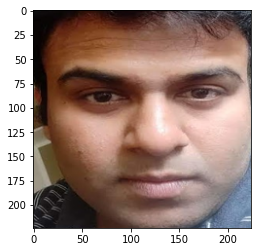

In [5]:
face_array = boxcrop_face_vgg(filename2)

In [6]:
from keras_vggface.vggface import VGGFace
# create a vggface2 model
model = VGGFace(model='resnet50')
# summarize input and output shape
print('Inputs: %s' % model.inputs)
print('Outputs: %s' % model.outputs)

Inputs: [<tf.Tensor 'input_4:0' shape=(None, 224, 224, 3) dtype=float32>]
Outputs: [<tf.Tensor 'classifier/Softmax:0' shape=(None, 8631) dtype=float32>]


In [7]:
model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_4[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
___________________________________________________________________________________

In [190]:
def walk_for_images(top_folder_path):
    filenames_all = []
    f = []
    i = 0
    for (dirpath, dirnames, filenames) in walk(top_folder_path):
        i += 1
        print( i, 'Dirpath is %s.' % dirpath , 'Dirname is %s.' % dirnames , 'fnames is %s.' % filenames,  ) 
        if dirnames ==  []:        
            for f in filenames:
                word_list = dirpath.split("\\")
#                 print(word_list[-1] )
                fullfname = join(dirpath,f)
                filenames_all.append(fullfname)
    return filenames_all                

In [191]:
toppath = r"C:\Users\cvsk7\OneDrive\Sturctured Content\My Projects\CV\images"
filenames_all = walk_for_images(toppath)

1 Dirpath is C:\Users\cvsk7\OneDrive\Sturctured Content\My Projects\CV\images. Dirname is ['faces']. fnames is [].
2 Dirpath is C:\Users\cvsk7\OneDrive\Sturctured Content\My Projects\CV\images\faces. Dirname is []. fnames is ['aji1.jpeg', 'aji2.jpeg', 'aji3.jpeg', 'Sai1.jpg', 'Sai2.jpg', 'Srav1.jpg', 'Tony stark now.jpg', 'Tony stark young.jpg'].


In [192]:
filenames_all

['C:\\Users\\cvsk7\\OneDrive\\Sturctured Content\\My Projects\\CV\\images\\faces\\aji1.jpeg',
 'C:\\Users\\cvsk7\\OneDrive\\Sturctured Content\\My Projects\\CV\\images\\faces\\aji2.jpeg',
 'C:\\Users\\cvsk7\\OneDrive\\Sturctured Content\\My Projects\\CV\\images\\faces\\aji3.jpeg',
 'C:\\Users\\cvsk7\\OneDrive\\Sturctured Content\\My Projects\\CV\\images\\faces\\Sai1.jpg',
 'C:\\Users\\cvsk7\\OneDrive\\Sturctured Content\\My Projects\\CV\\images\\faces\\Sai2.jpg',
 'C:\\Users\\cvsk7\\OneDrive\\Sturctured Content\\My Projects\\CV\\images\\faces\\Srav1.jpg',
 'C:\\Users\\cvsk7\\OneDrive\\Sturctured Content\\My Projects\\CV\\images\\faces\\Tony stark now.jpg',
 'C:\\Users\\cvsk7\\OneDrive\\Sturctured Content\\My Projects\\CV\\images\\faces\\Tony stark young.jpg']

In [193]:
# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
    # extract faces
    faces = [boxcrop_face_vgg(f) for f in filenames]
    # convert into an array of samples
    samples = np.asarray(faces, 'float32')
    # prepare the face for the model, e.g. center pixels
    samples = preprocess_input(samples, version=2)
    # create a vggface model
    model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
    # perform prediction
    yhat = model.predict(samples)
    return yhat

Image hwc C:\Users\cvsk7\OneDrive\Sturctured Content\My Projects\CV\images\faces\aji1.jpeg (1024, 860, 3)
[{'box': [231, 91, 363, 493], 'confidence': 0.9999959468841553, 'keypoints': {'left_eye': (327, 273), 'right_eye': (489, 272), 'nose': (404, 373), 'mouth_left': (338, 450), 'mouth_right': (482, 450)}}]
231 91 363 493
231 91 594 584
Image hwc C:\Users\cvsk7\OneDrive\Sturctured Content\My Projects\CV\images\faces\aji2.jpeg (640, 640, 3)
[{'box': [366, 253, 51, 62], 'confidence': 0.9997668862342834, 'keypoints': {'left_eye': (381, 274), 'right_eye': (406, 275), 'nose': (393, 287), 'mouth_left': (381, 298), 'mouth_right': (404, 299)}}]
366 253 51 62
366 253 417 315
Image hwc C:\Users\cvsk7\OneDrive\Sturctured Content\My Projects\CV\images\faces\aji3.jpeg (692, 389, 3)
[{'box': [126, 114, 106, 141], 'confidence': 0.9999996423721313, 'keypoints': {'left_eye': (156, 169), 'right_eye': (206, 168), 'nose': (184, 196), 'mouth_left': (158, 219), 'mouth_right': (207, 218)}}]
126 114 106 141
12

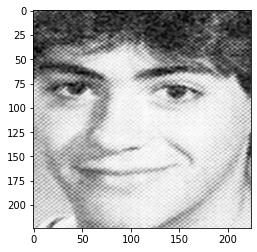

In [194]:
preds = get_embeddings(filenames_all)

In [195]:
preds.shape

(8, 2048)

In [133]:
# determine if a candidate face is a match for a known face
def is_match_dist(known_embedding, candidate_embedding, thresh=0.5):
    # calculate distance between embeddings
    score = cosine(known_embedding, candidate_embedding)
    
    if score <= thresh:
        print('face is a Match (%.3f <= %.3f)' % (score, thresh))
    else:
        print('face is NOT a Match (%.3f > %.3f)' % (score, thresh))

In [198]:
is_match_dist(preds[0],preds[1])

face is NOT a Match (0.596 > 0.500)


In [135]:
# determine if a candidate face is a match for a known face
def is_match_similar(known_embedding, candidate_embedding, thresh=0.5):
    # calculate distance between embeddings
    score = cosine(known_embedding, candidate_embedding)
    score = score - 1
    score = -1 * score
    if score >= thresh:
        print('face is a Match (%.3f >= %.3f)' % (score, thresh))
    else:
        print('face is NOT a Match (%.3f < %.3f)' % (score, thresh))

In [136]:
is_match_similar(preds[3],preds[4])

face is NOT a Match (0.323 < 0.500)
